In [2]:
#Taking the first look to the Kaggle dataset: "Churn Prediction"
#This will be done to see what type of pre-processing I'm going to do

In [3]:
from zipfile import ZipFile
import pandas as pd 
import seaborn as sns
import pyarrow 

In [4]:
#Importing data
data_zip = '/home/natalia/customer-churn-prediction-2020.zip'

with ZipFile(data_zip,'r') as zip:
    zip.printdir()
    zip.extractall('/home/natalia/churn-prediction/data')

train_df = pd.read_csv('/home/natalia/churn-prediction/data/train.csv')
sample_submission = pd.read_csv('/home/natalia/churn-prediction/data/sampleSubmission.csv')

File Name                                             Modified             Size
sampleSubmission.csv                           2020-04-15 11:40:32         6189
test.csv                                       2020-04-15 11:40:32        70061
train.csv                                      2020-04-15 11:40:32       391872


In [5]:
#taking the first look into the data
train_df.shape

(4250, 20)

In [6]:
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [7]:
train_df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [8]:
#Checking the presence of some Nan to evaluete the possibility of deleting some column
train_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [10]:
#Taking a look at the train stats
train_df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [25]:
#churn answer comparison 
train_df['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [12]:
#Comparing the stats with 'no' churn with the complete dataframe
churn_no = train_df[train_df.churn == 'no']
churn_no.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,99.924973,8.177437,175.555093,99.813801,29.844948,198.570674,100.231380,16.878743,199.577519,99.942771,8.981131,10.194441,4.460570,2.753018,1.441676
std,39.748743,13.706304,49.549782,19.659616,8.423424,49.897726,19.936117,4.241312,50.521152,20.066126,2.273463,2.749911,2.433859,0.742466,1.165159
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,142.500000,87.000000,24.230000,164.575000,87.000000,13.987500,165.975000,87.000000,7.470000,8.500000,3.000000,2.300000,1.000000
50%,99.000000,0.000000,178.250000,100.000000,30.300000,199.200000,100.000000,16.930000,199.300000,100.000000,8.970000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,210.700000,113.000000,35.820000,231.725000,114.000000,19.692500,233.125000,113.000000,10.490000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,313.800000,160.000000,53.350000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,19.700000,19.000000,5.320000,8.000000


In [13]:
churn_no.shape[0] #number of people who didn't give up from the telecom company

3652

In [14]:
#Comparing the stats with 'yes' churn with the complete datafram
churn_yes = train_df[train_df.churn == 'yes']
churn_yes.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,102.137124,4.299331,208.990134,100.478261,35.528679,209.964883,99.841137,17.847207,206.331773,99.209030,9.285033,10.632441,4.217391,2.871254,2.275920
std,39.369162,11.124649,69.183493,20.988919,11.761417,51.312321,19.752909,4.361545,48.959820,20.263378,2.203215,2.794494,2.626925,0.754413,1.827334
min,2.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,42.000000,2.130000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,0.000000,151.175000,87.000000,25.697500,172.150000,87.000000,14.635000,172.825000,84.000000,7.780000,8.800000,2.000000,2.380000,1.000000
50%,101.000000,0.000000,220.550000,101.000000,37.495000,210.200000,99.500000,17.870000,206.100000,99.000000,9.275000,10.600000,4.000000,2.860000,2.000000
75%,125.000000,0.000000,266.975000,114.000000,45.385000,248.100000,113.000000,21.090000,241.250000,114.000000,10.857500,12.700000,5.000000,3.430000,4.000000
max,225.000000,48.000000,351.500000,165.000000,59.760000,349.400000,168.000000,29.700000,381.600000,158.000000,17.170000,20.000000,20.000000,5.400000,9.000000


In [15]:
churn_yes.shape[0] #number of people who gave up from the telecom company

598

<AxesSubplot:>

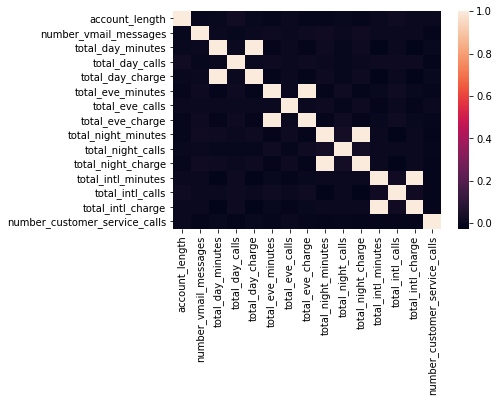

In [16]:
#Evaluating the correlation between variables
train_corr = train_df.corr()
sns.heatmap(train_corr)

In [17]:
import os
for file_csv in os.listdir('/home/natalia/churn-prediction/data/'):
    file_df = pd.read_csv('/home/natalia/churn-prediction/data/'+ file_csv)
    if 'train.csv' in file_csv:
        file_df.to_parquet('/home/natalia/churn-prediction/parquet_data/'+'train.parquet')
    elif 'test.csv' in file_csv:
        file_df.to_parquet('/home/natalia/churn-prediction/parquet_data/'+'test.parquet')
    elif 'sampleSubmission.csv' in file_csv:
        file_df.to_parquet('/home/natalia/churn-prediction/parquet_data/'+'sampleSubm.parquet')


In [18]:
# Converting .csv to parquet
train_df.to_parquet('/home/natalia/parquet')

In [19]:
#putting the data into a s3 - Simple Storage Service from Amazon
import boto3 #AWS SDK for Python


In [20]:
s3 = boto3.resource('s3')


In [21]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

customer-churn-2020


In [22]:
# Upload a new file
object = s3.Object('customer-churn-2020', 'customer_churn.parquet')
object.put(Body=binary_data)

NameError: name 'binary_data' is not defined